# Introduction to Neural Networks: Logistic Regression and Loss

Author: Pierre Nugues

Initial Dataset from Berkson on *Using Logistic Regression for Classification* (1944)

In [1]:
dose = [40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300]
exposed = [462, 500, 467, 515, 561, 469, 550, 542, 479, 497, 453]
mortality = [109, 199, 298, 370, 459, 400, 495, 499, 450, 476, 442]
dataset = list(zip(dose, exposed, mortality))
dataset

[(40, 462, 109),
 (60, 500, 199),
 (80, 467, 298),
 (100, 515, 370),
 (120, 561, 459),
 (140, 469, 400),
 (160, 550, 495),
 (180, 542, 499),
 (200, 479, 450),
 (250, 497, 476),
 (300, 453, 442)]

## Formatting the Data

In [2]:
from math import log10
import numpy as np

X = []
y = []
for obs in dataset:
    mortality_nbr = obs[2]
    survival_nbr = obs[1] - mortality_nbr
    for _ in range(mortality_nbr):
        X += [obs[0]]
        y += [1]
    for _ in range(survival_nbr):
        X += [obs[0]]
        y += [0]

#X = list(map(log10, X))
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
np.hstack((X, y))

array([[ 40,   1],
       [ 40,   1],
       [ 40,   1],
       ...,
       [300,   0],
       [300,   0],
       [300,   0]])

## Using the Logistic Curve (Sigmoid)

A simple logictic regression architecture

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

np.random.seed(0)

model = Sequential([
    Dense(1, input_dim=1, activation='sigmoid')])
model.compile(optimizer='nadam', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We fit it

In [4]:
history = model.fit(X, y, epochs=50, verbose=0)
model.evaluate(X, y)

172/172 [==============================] - 0s 523us/step - loss: 0.4204 - accuracy: 0.8082


[0.42035916447639465, 0.8081892728805542]

## The Model Weights

In [5]:
model.get_weights()

[array([[0.01876769]], dtype=float32), array([-0.9961213], dtype=float32)]

## The Curves

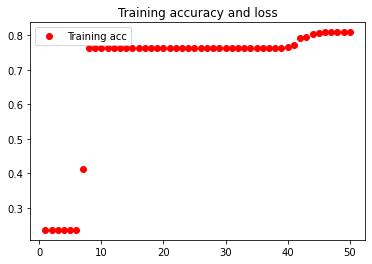

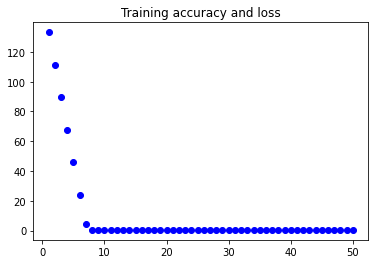

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.title('Training accuracy and loss')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training accuracy and loss')
plt.show()

## Computing the Loss

The crossentropy loss is defined as:
$
H(P,M) = - \frac{1}{|X|} \sum\limits_{x \in X} {P(x)\log M(x),} 
$

### First, a simple example:
We draw individuals

In [7]:
from math import log

random_observations = np.random.choice(X.shape[0], 6, replace = False)
print(random_observations)

[1189 3209 1984 1484 1625  918]


Which dose did they ingest and what was the outcome?

In [8]:
X_choice = list(X[random_observations])
print('Dose:', X_choice)
y_choice = list(y[random_observations])
print('Observed class:', y_choice)

Dose: [array([80]), array([160]), array([120]), array([100]), array([100]), array([60])]
Observed class: [array([1]), array([1]), array([1]), array([1]), array([1]), array([0])]


What is the predicted outcome?

In [9]:
probs_raw = list(map(model.predict, X_choice))
print('Predicted probs for class 1:', probs_raw)

Predicted probs for class 1: [array([[0.62370265]], dtype=float32), array([[0.88149977]], dtype=float32), array([[0.77833706]], dtype=float32), array([[0.70695645]], dtype=float32), array([[0.70695645]], dtype=float32), array([[0.5324394]], dtype=float32)]


Let us compute the cross-entropy

In [10]:
probs = [log(p) * y + log(1 - p) * (1 - y) for p, y in zip(probs_raw, y_choice)]
print('Crossentropy per observation:', probs)
entropy = -sum(probs)/6
print('Crossentropy:', entropy)

Crossentropy per observation: [array([-0.47208155]), array([-0.12613054]), array([-0.25059561]), array([-0.34678622]), array([-0.34678622]), array([-0.76022634])]
Crossentropy: [0.38376775]


### The whole dataset
We compute it over the whole training set

In [11]:
probs_raw = model.predict(X)
probs = [log(p) * y + log(1 - p) * (1 - y) for p, y in zip(probs_raw, y)]
sum(probs)/X.shape[0]

array([-0.42035945])